In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
plor_folder = '/Users/mrenke/data/ds-dnumrisk/plots_and_ims/behavior_risk/' 
sns.set_context('talk')


In [4]:
from utils import get_data

df = get_data()
df.head()

number of subjects in dataframe: 66
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
           dtype='int64', name='subject')


choice   n1    n2  prob1  prob2  \
subject session format       trial_nr                                    
13      1       non-symbolic 1           True  7.0  16.0   0.55    1.0   
                             2          False  5.0   7.0   0.55    1.0   
                             3           True  7.0  14.0   0.55    1.0   
                             4          False  7.0   9.0   0.55    1.0   
                             6           True  7.0  14.0   0.55    1.0   

                                       risky_left  chose_risky  n_risky  \
subject session format       trial_nr                                     
13      1       non-symbolic 1               True         True     16.0   
                             2               True        False      7.0   
                             3               True         True     14.0   
                             4               True        False      9.0   
                             6               True         True     14.0   

                                       n_safe      frac  log(risky/safe)  \
subject session format       trial_nr                                      
13      1       non-symbolic 1            7.0  2.285714         0.826679   
                             2            5.0  1.400000         0.336472   
                             3            7.0  2.000000         0.693147   
                             4            7.0  1.285714         0.251314   
                             6            7.0  2.000000         0.693147   

                                        log(n1) bin(risky/safe)  p1    p2  \
subject session format       trial_nr                                       
13      1       non-symbolic 1         2.772589             56%   1  0.55   
                             2         1.945910             32%   1  0.55   
                             3         2.639057             44%   1  0.55   
                             4         2.197225             20%   1  0.55   
                             6         2.639057             44%   1  0.55   

                                       group  
subject session format       trial_nr         
13      1       non-symbolic 1             1  
                             2             1  
                             3             1  
                             4             1  
                             6             1

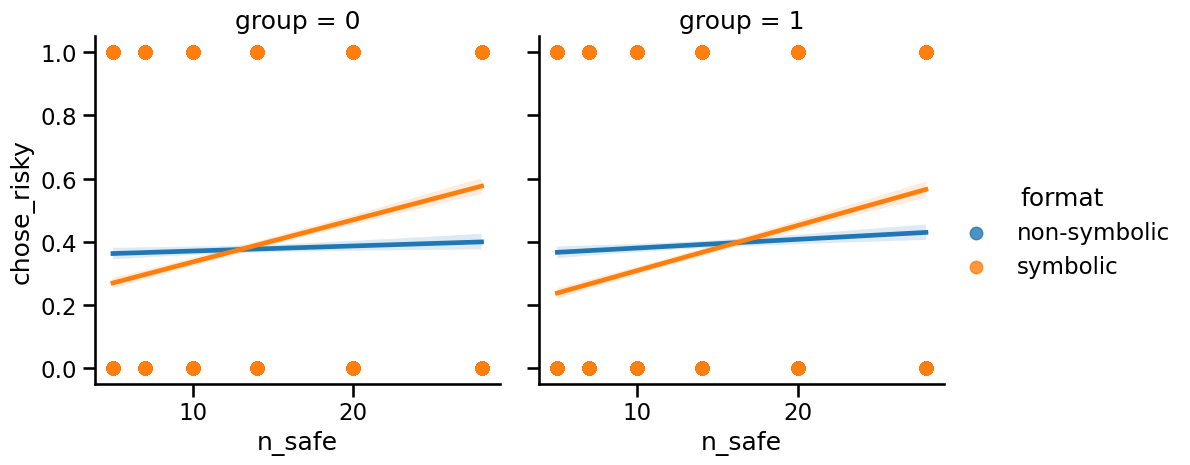

In [5]:
fig = sns.lmplot(df.reset_index(), x='n_safe', y='chose_risky', hue='format', col='group',ci=95)


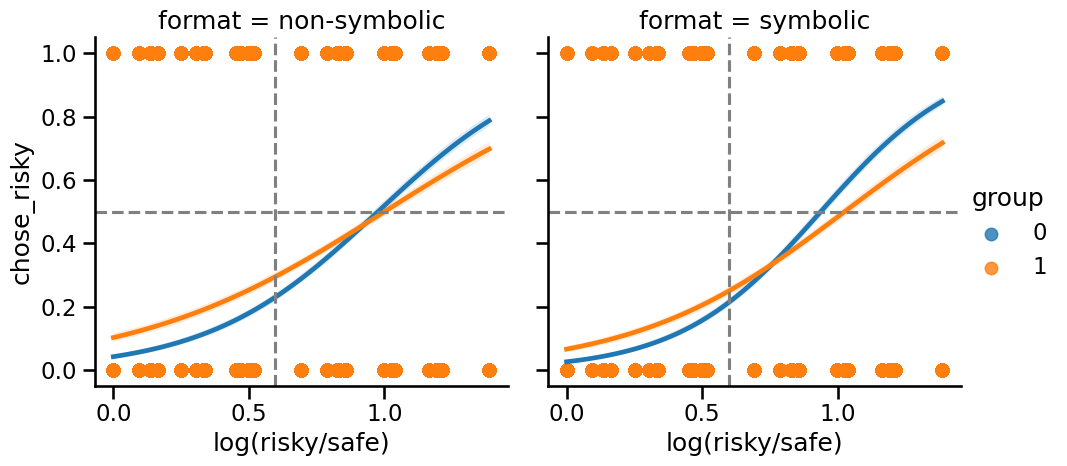

In [6]:
x_var = 'log(risky/safe)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_risky', hue= 'group', col='format',ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')


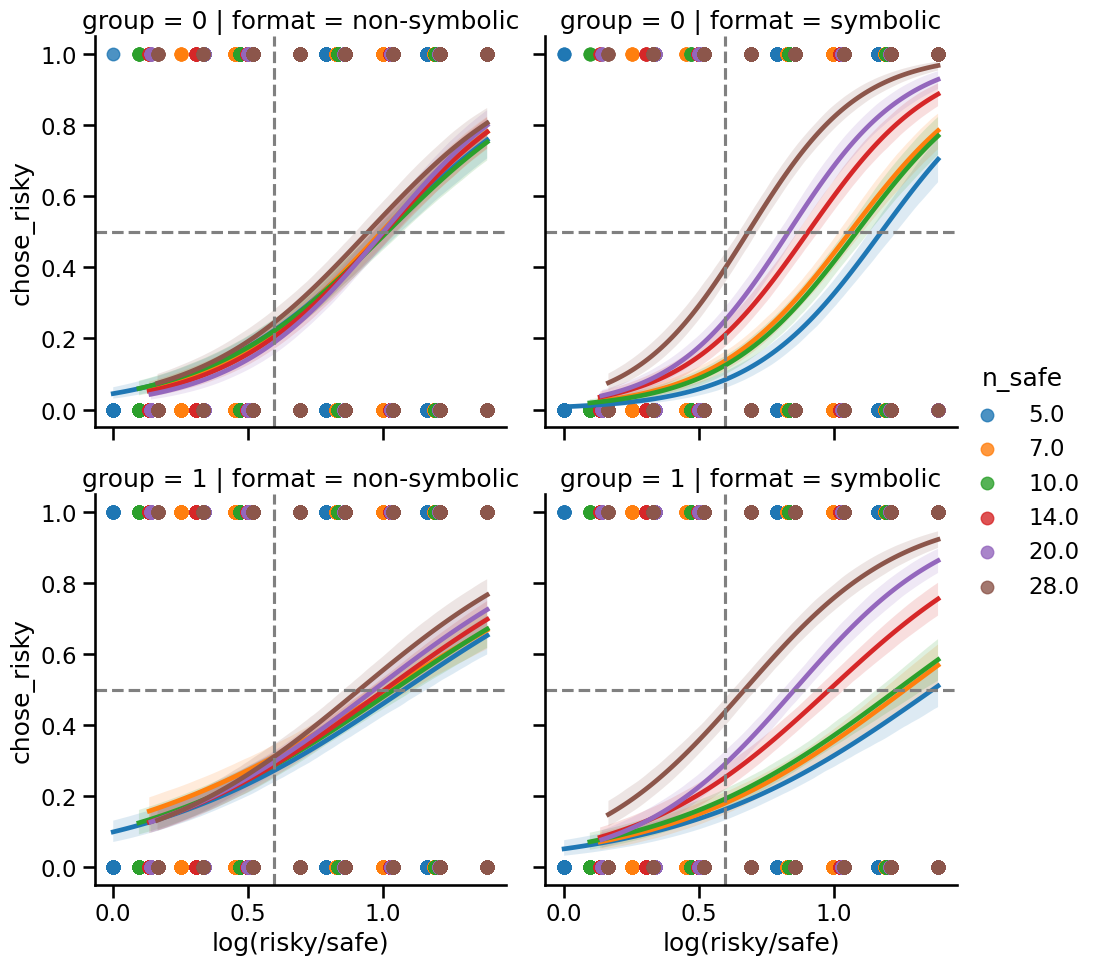

In [3]:
x_var = 'log(risky/safe)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_risky', hue= 'n_safe', col='format',row= 'group', ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')


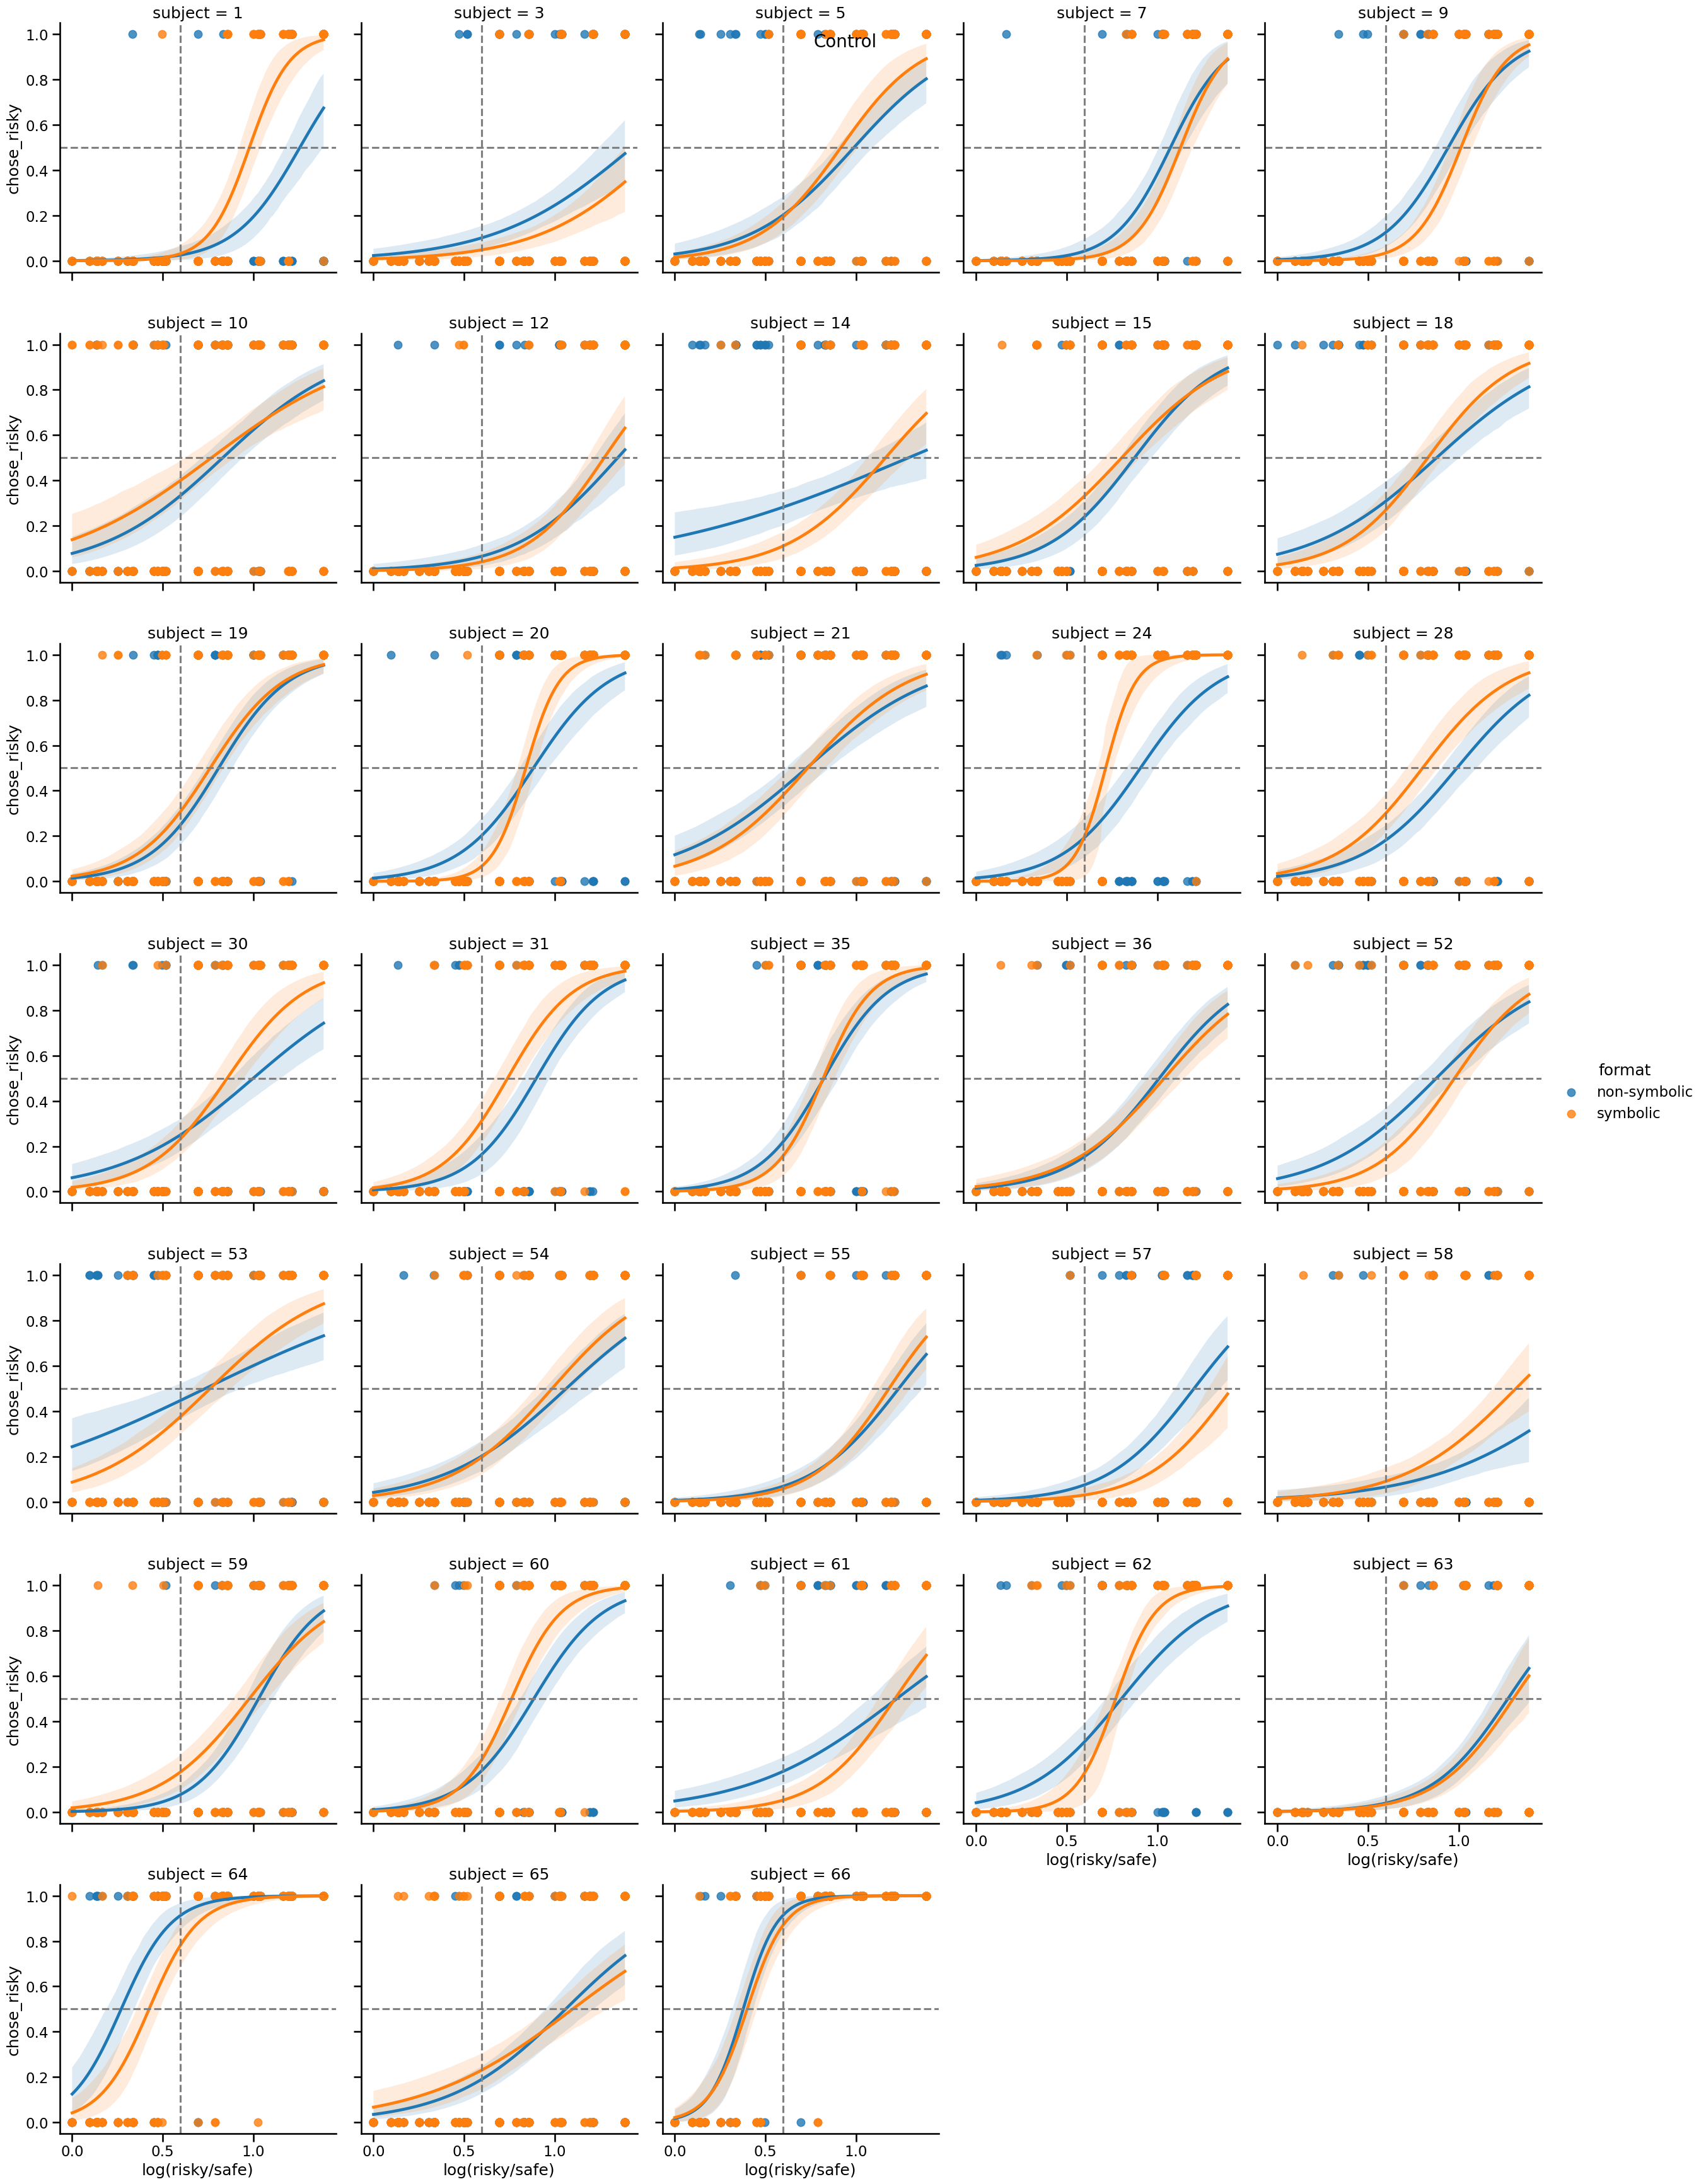

In [9]:
tmp = df[df['group']==0]
g = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_risky', hue='format', col='subject',ci=95,  logistic=True, col_wrap=5)

for ax in g.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')

g.fig.suptitle('Control', fontsize=20)
plt.savefig(op.join(plor_folder, 'psymetCurves_control.pdf'))


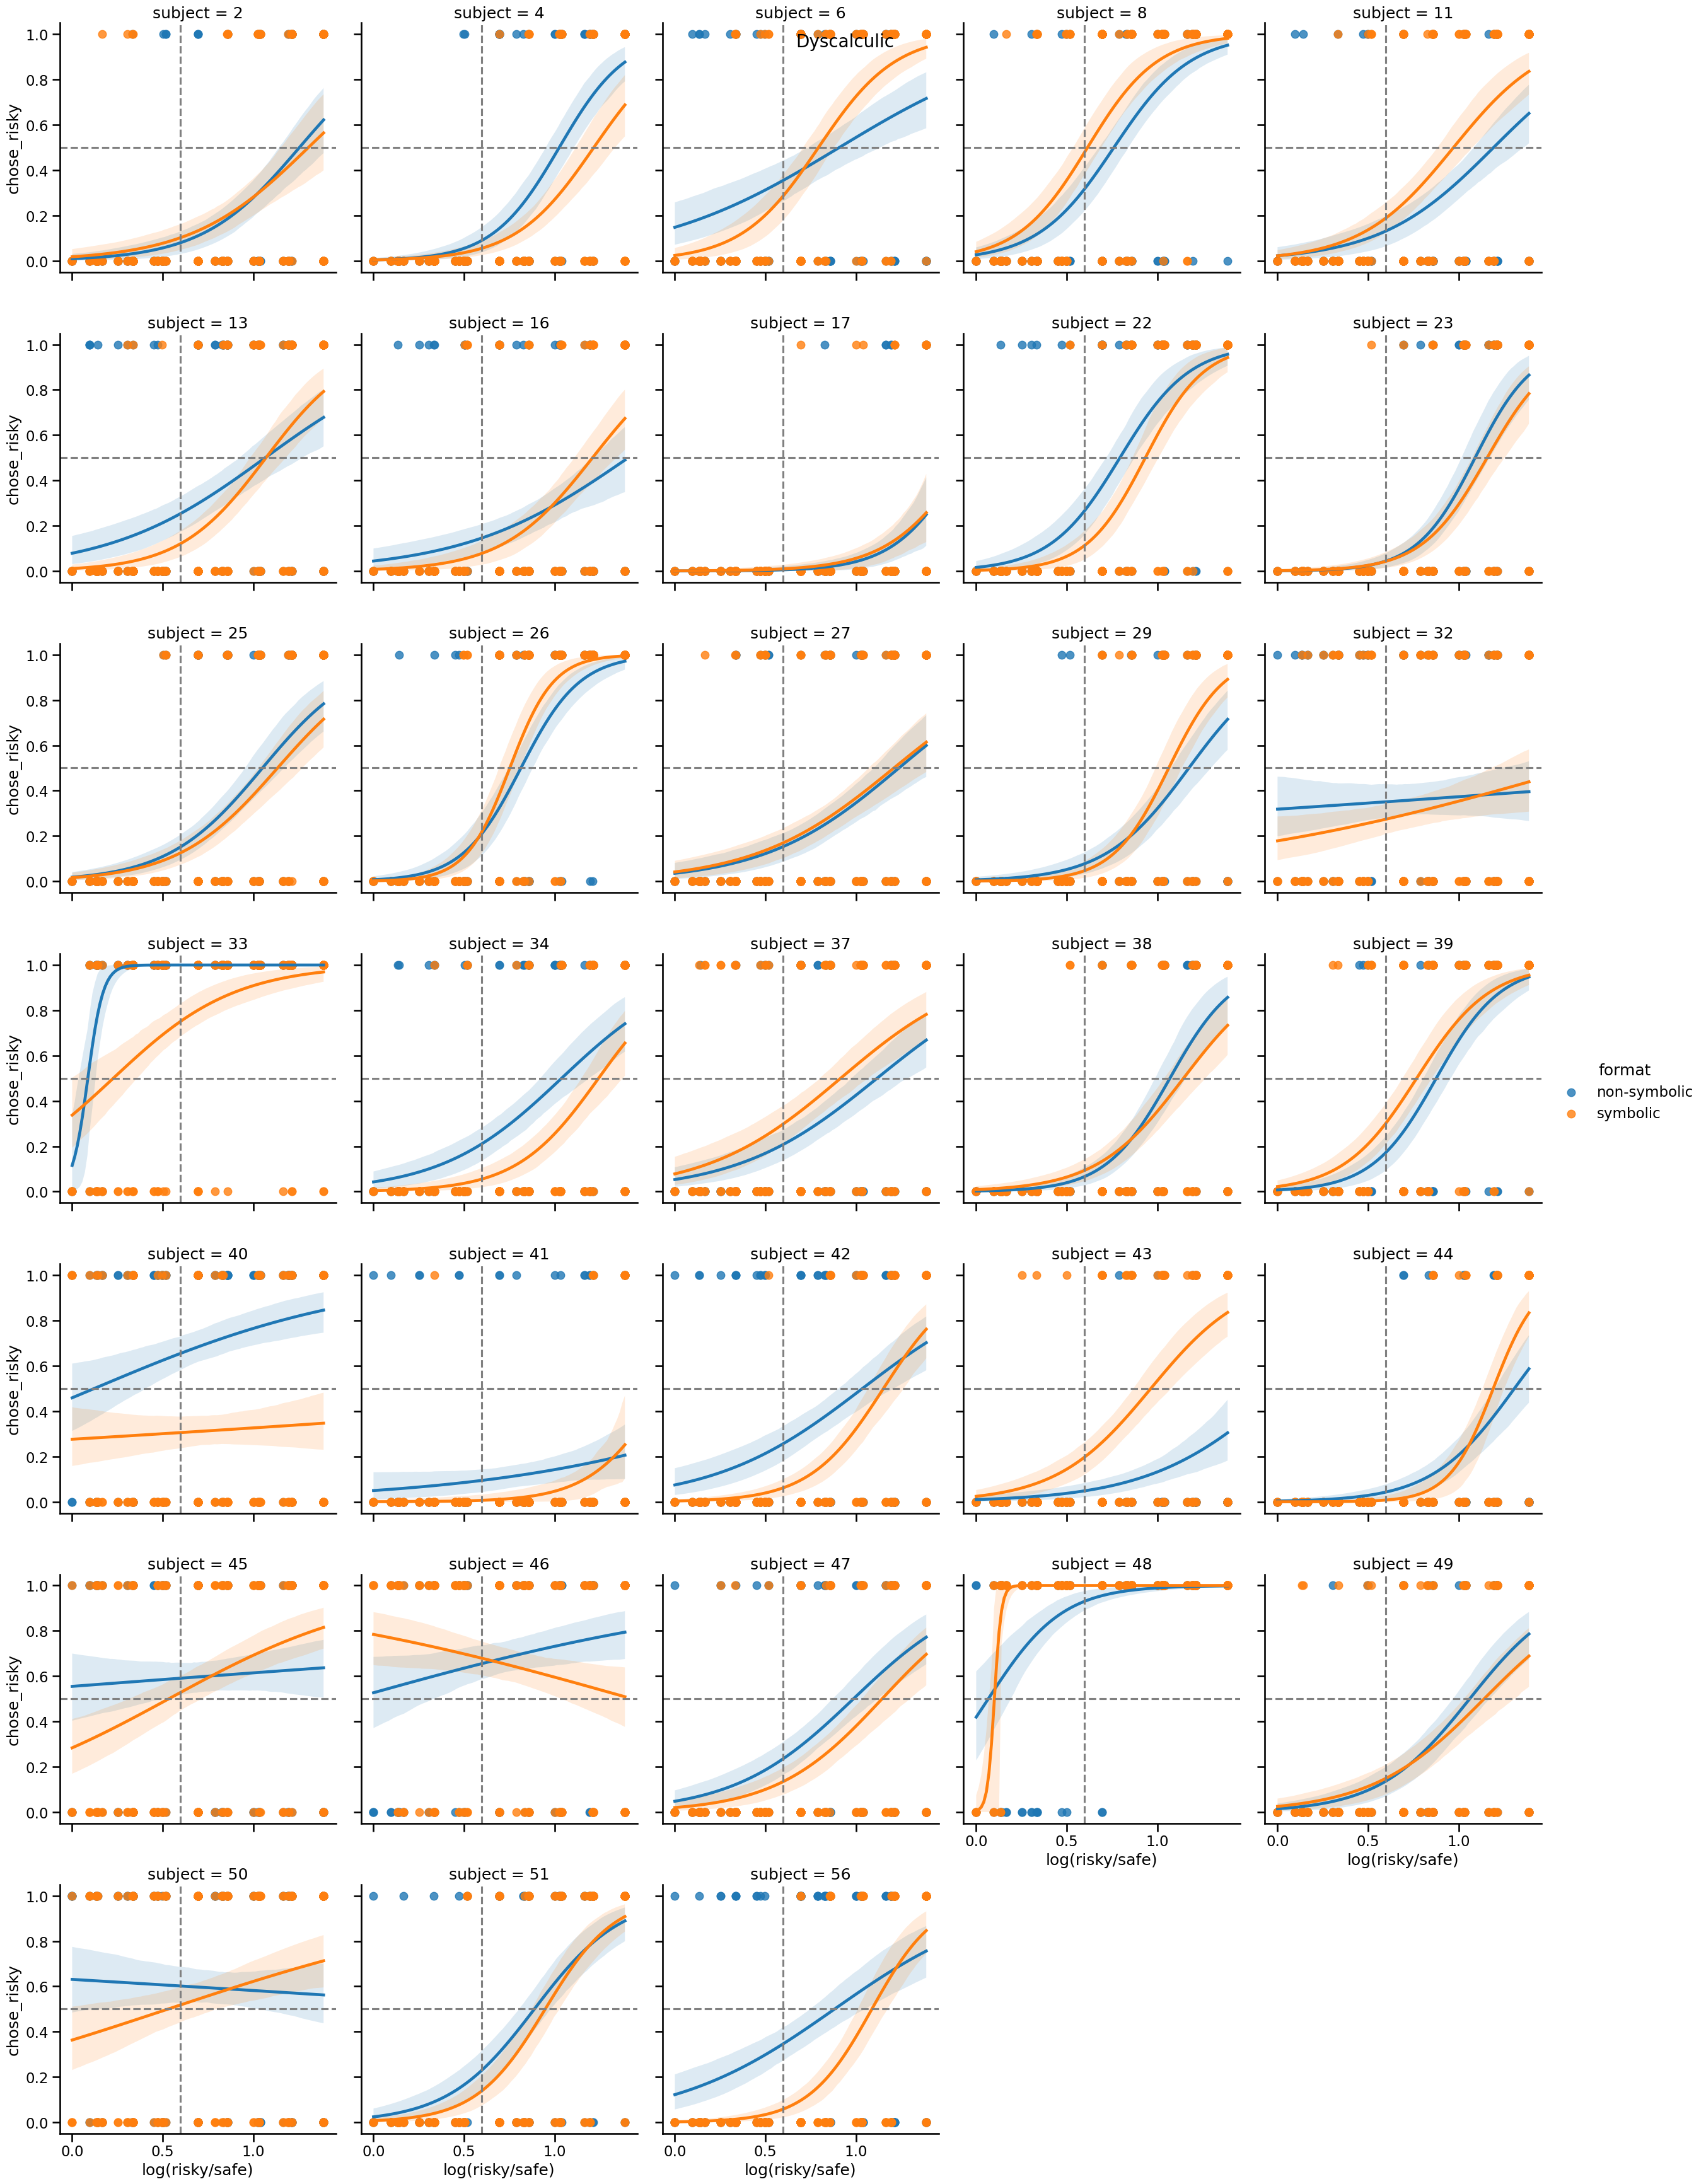

In [10]:
tmp = df[df['group']==1]
g = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_risky', hue='format', col='subject',ci=95,  logistic=True, col_wrap=5)

for ax in g.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')

g.fig.suptitle('Dyscalculic', fontsize=20)
plt.savefig(op.join(plor_folder, 'psymetCurves_dyscalc.pdf'))

Text(0.5, 0.98, 'Control')

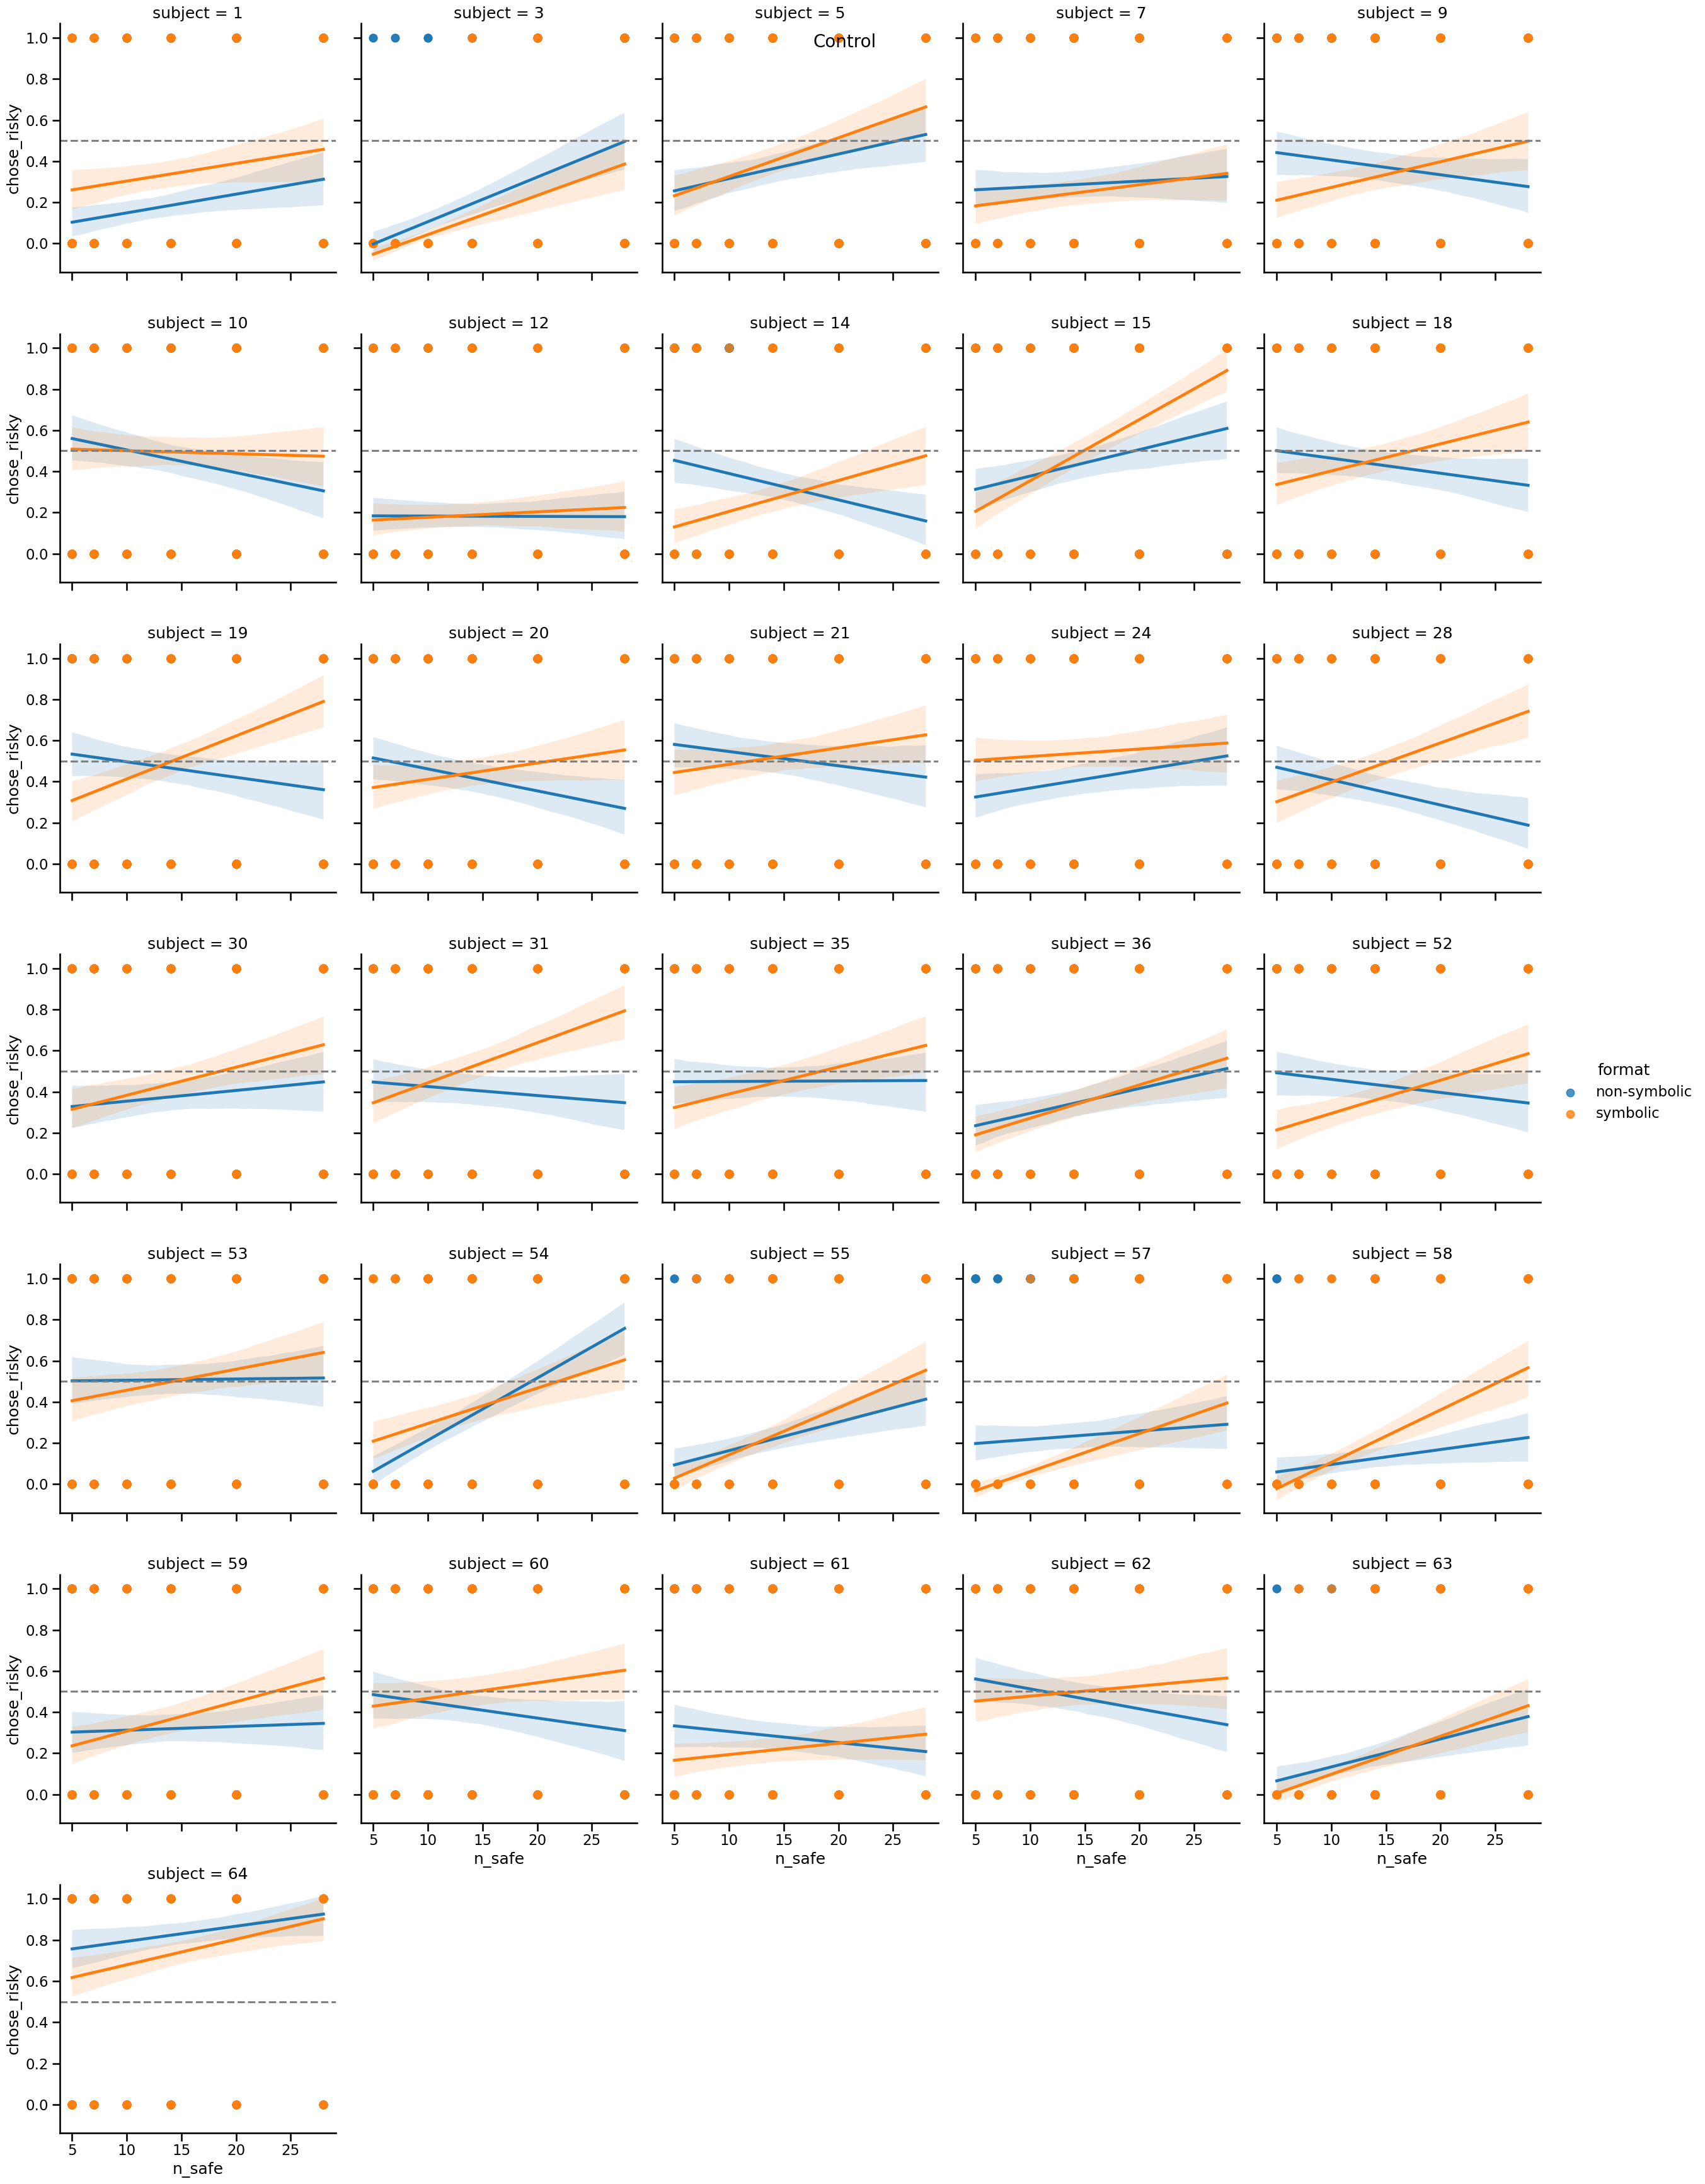

In [5]:
tmp = df[df['group']==0]
g = sns.lmplot(tmp.reset_index(), x='n_safe', y='chose_risky', hue='format', col='subject',ci=95, col_wrap=5)

for ax in g.axes.flat:
    ax.axhline(y=0.5,color='grey', ls='--')
g.fig.suptitle('Control', fontsize=20)

Text(0.5, 0.98, 'Control')

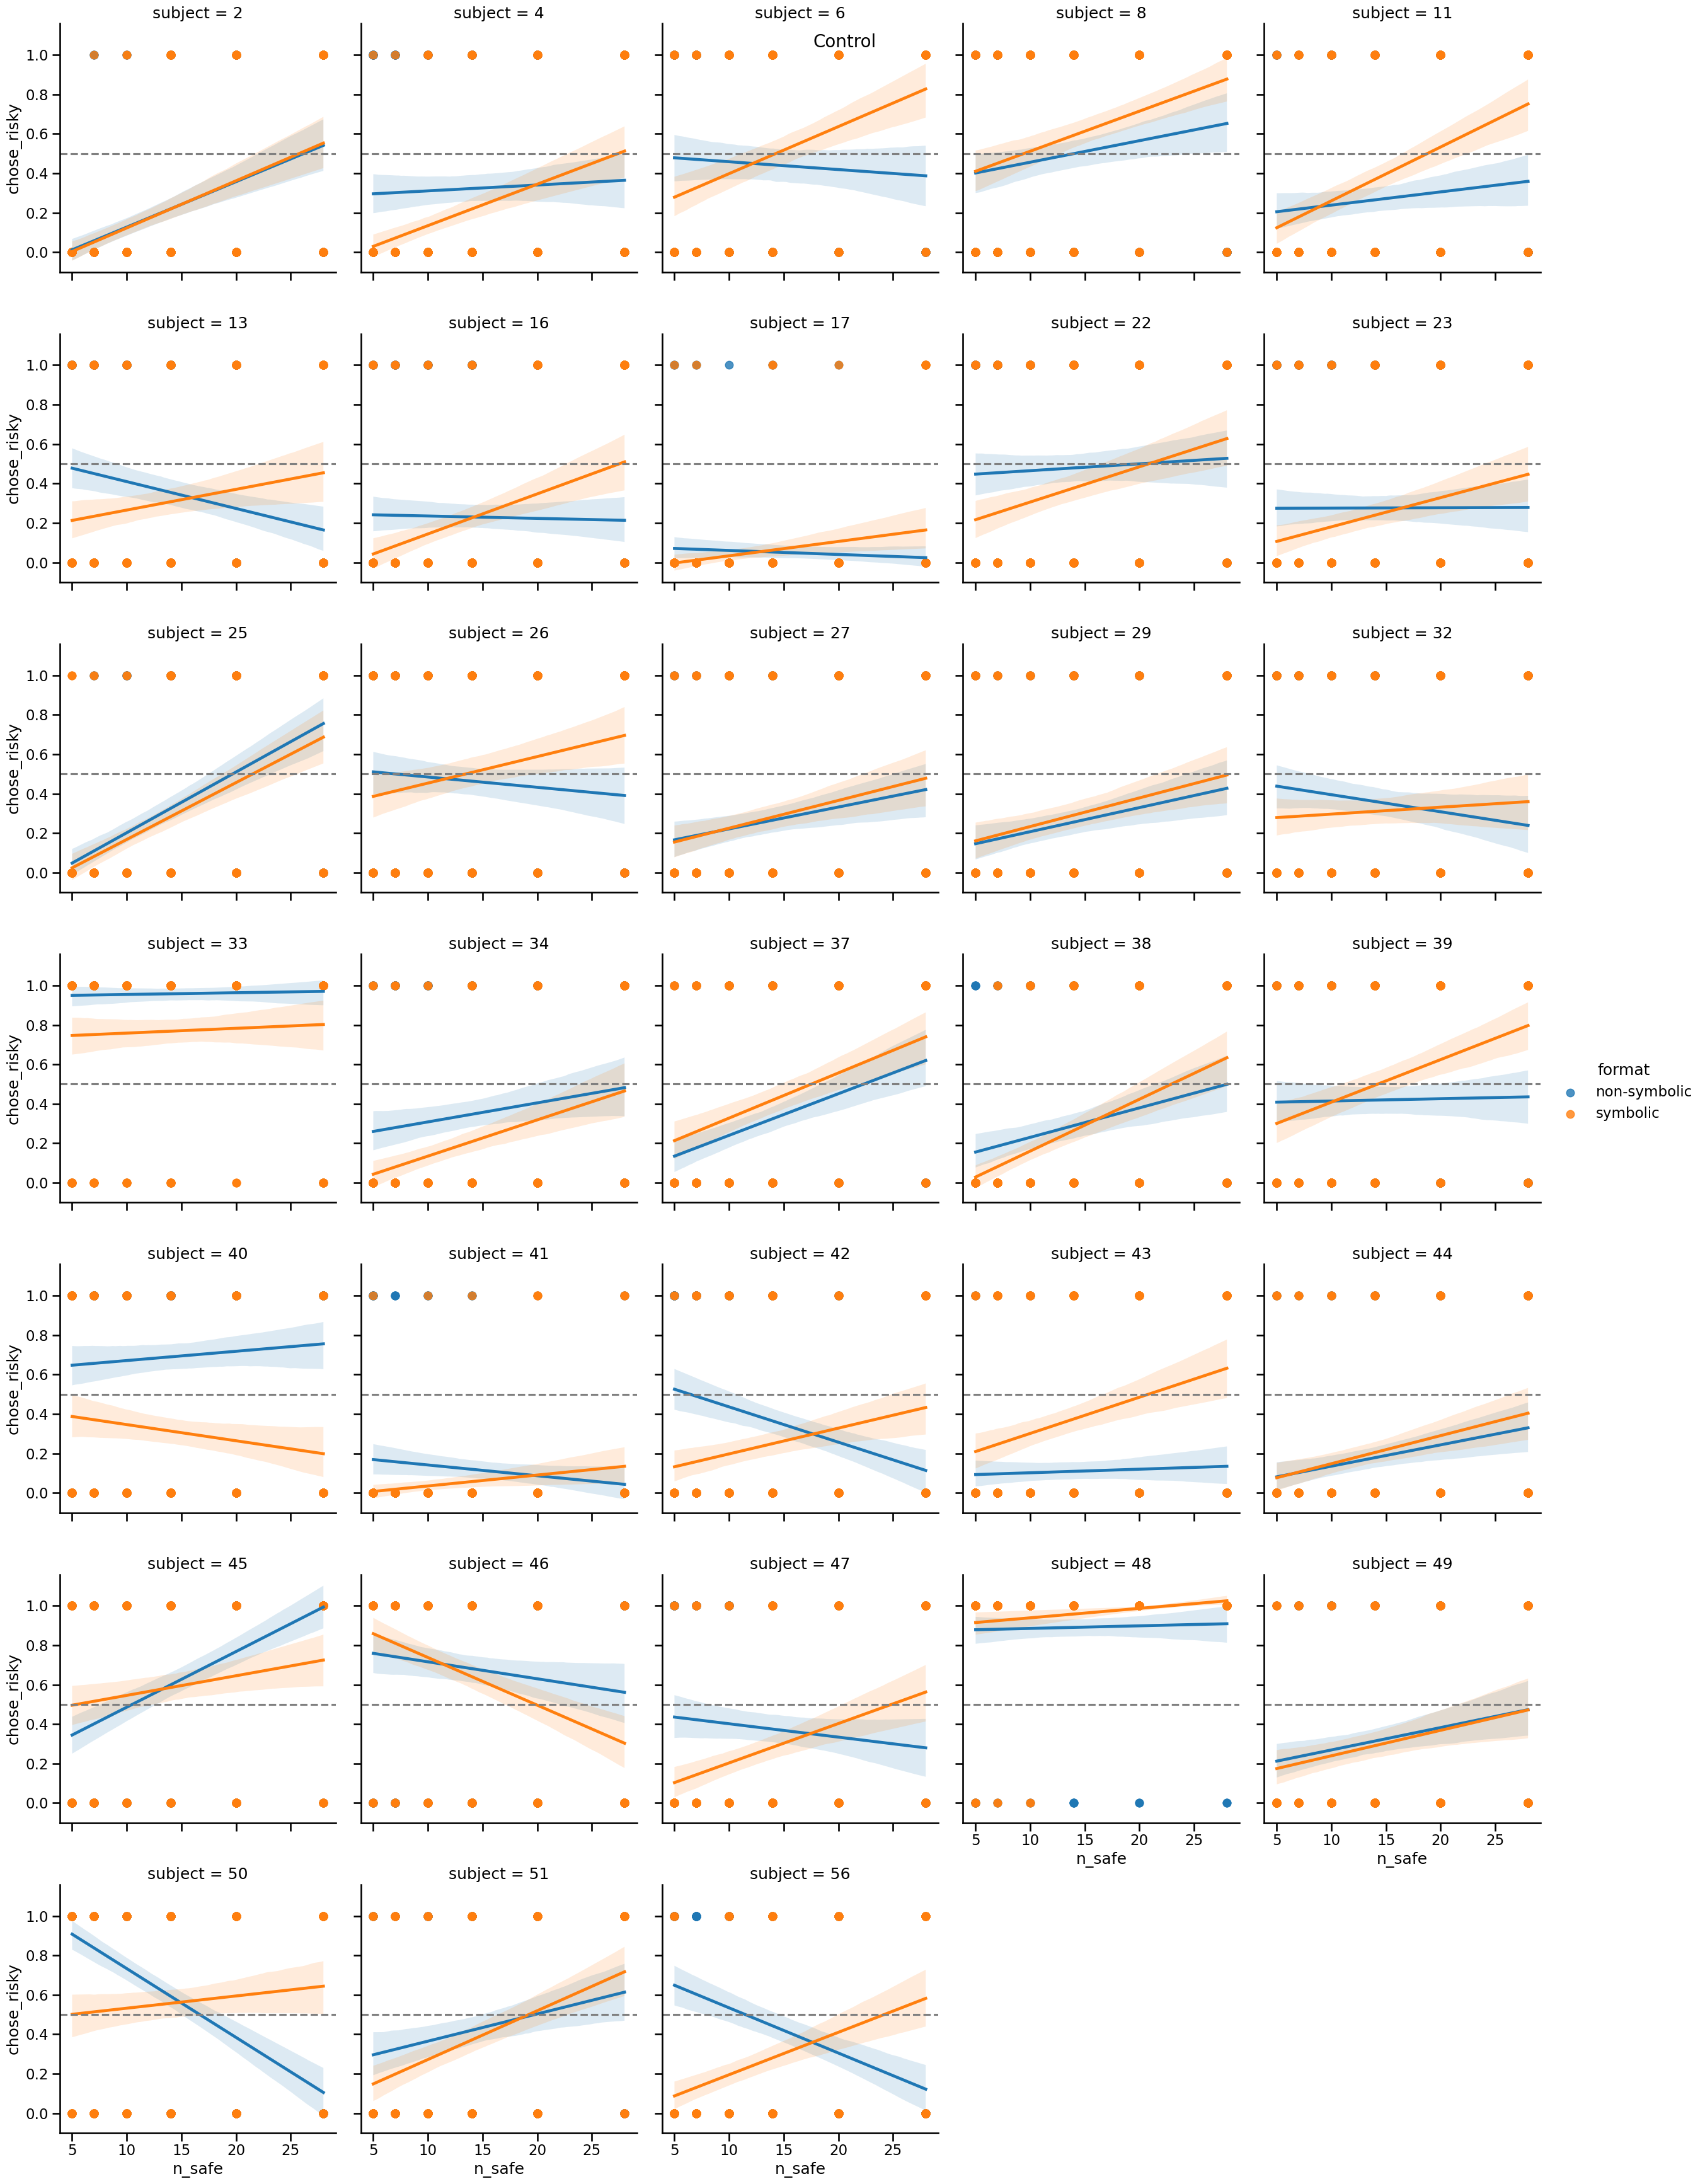

In [6]:
tmp = df[df['group']==1]
g = sns.lmplot(tmp.reset_index(), x='n_safe', y='chose_risky', hue='format', col='subject',ci=95, col_wrap=5)

for ax in g.axes.flat:
    ax.axhline(y=0.5,color='grey', ls='--')
g.fig.suptitle('Control', fontsize=20)